In [520]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from imblearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import roc_curve, auc
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LogNorm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
! pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
! pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier
! pip install lifelines
from lifelines import CoxPHFitter
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

In [521]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [522]:
df = pd.read_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,White British,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
7,10001901,M,NaN,A,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1.325147,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10002351,F,NaN,A,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.158135,29.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [523]:
df.shape

(33690, 80)

In [524]:
df.isna().sum()

PATIENTID                       0
SEX                             0
ETHNICITY                    1960
NEWVITALSTATUS                  0
NUMBER_TUMOURS                  0
C180                            0
C181                            0
C182                            0
C183                            0
C184                            0
C185                            0
C186                            0
C187                            0
C188                            0
BEH_BENIGN                      0
BEH_MALIG                       0
BEH_MICINV                      0
BEH_INSITU                      0
BEH_UNCERT                      0
T0                              0
T1                              0
T2                              0
T3                              0
T4                              0
N0                              0
N1                              0
N2                              0
N3                              0
M1                              0
STAGE0        

In [525]:
df.dtypes

PATIENTID                       int64
SEX                          category
ETHNICITY                    category
NEWVITALSTATUS               category
NUMBER_TUMOURS                  int64
C180                            int64
C181                            int64
C182                            int64
C183                            int64
C184                            int64
C185                            int64
C186                            int64
C187                            int64
C188                            int64
BEH_BENIGN                      int64
BEH_MALIG                       int64
BEH_MICINV                      int64
BEH_INSITU                      int64
BEH_UNCERT                      int64
T0                              int64
T1                              int64
T2                              int64
T3                              int64
T4                              int64
N0                              int64
N1                              int64
N2          

In [526]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    25237
1     8453
Name: DEAD, dtype: int64

In [527]:
df = df.drop(['NEWVITALSTATUS'], axis=1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
7,10001901,M,NaN,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1.325147,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10002351,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.158135,29.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [528]:
df['CANCER_YEARS_MEDIAN'].describe()

count    33690.000000
mean         2.077229
std          1.117319
min          0.000000
25%          1.251224
50%          2.072596
75%          3.005537
max          4.043889
Name: CANCER_YEARS_MEDIAN, dtype: float64

In [529]:
df.shape

(33690, 80)

In [530]:
horizon = 2

In [531]:
df = df[((df['DEAD'] == 1) & (df['CANCER_YEARS_MEDIAN'] <= horizon)) | ((df['DEAD']== 0) & 
        (df['CANCER_YEARS_MEDIAN'] >= horizon))]
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
9,10002391,M,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.083547,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,10002619,M,White British,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.089023,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [532]:
df.shape

(24349, 80)

In [533]:
df['DEAD'].value_counts()

0    16674
1     7675
Name: DEAD, dtype: int64

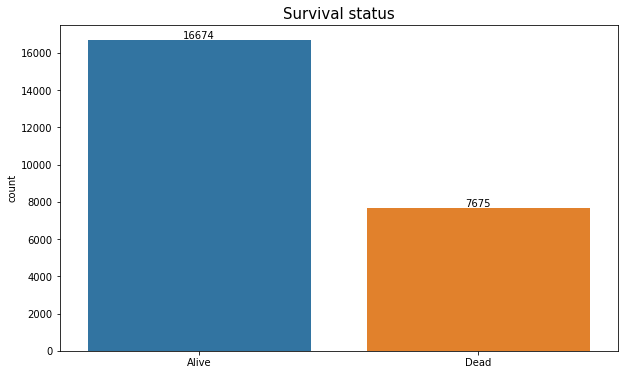

In [534]:
ax = sns.countplot(data=df, x='DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Survival status', fontsize=15)
ax.set_xlabel('')
plt.gcf().set_size_inches(10,6)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha="center")

In [535]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 68.48
Percentage of patients classified as dead: 31.52


In [536]:
new_memory = df.memory_usage(deep = True).sum() / 1024 ** 2 
print('Memory used: %.1f GB' % new_memory)

Memory used: 15.2 GB


In [537]:
df.columns

Index(['PATIENTID', 'SEX', 'ETHNICITY', 'NUMBER_TUMOURS', 'C180', 'C181',
       'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'T0', 'T1', 'T2',
       'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2',
       'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4',
       'AGE_MEDIAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201',
       'L0301', 'L0901', 'CURATIVE_TREAT', 'NONCURATIVE_TREAT',
       'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'DEPR1',
       'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_YEARS_MEDIAN',
       'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI',
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2',
       'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2',
       'OTHER2', 'DEAD'],
      dtype='ob

In [538]:
df = pd.concat([df[['PATIENTID', 'NUMBER_TUMOURS', 'C180', 
       'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 
       'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN',
       'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901',
       'CURATIVE_TREAT', 'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN',
       'BMI', 'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2',
       'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2',
       'OTHER2', 'DEAD']],                      
        pd.get_dummies(df['ETHNICITY'], prefix = 'ETHNICITY'),
        pd.get_dummies(df['SEX'], prefix = 'SEX')
        ], axis = 1)
df.head()

,PATIENTID,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
0,10001000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,10001128,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,10001482,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,10002391,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.083547,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
10,10002619,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.089023,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [539]:
df.isna().sum()

PATIENTID                                  0
NUMBER_TUMOURS                             0
C180                                       0
C181                                       0
C182                                       0
C183                                       0
C184                                       0
C185                                       0
C186                                       0
C187                                       0
C188                                       0
BEH_BENIGN                                 0
BEH_MALIG                                  0
BEH_MICINV                                 0
BEH_INSITU                                 0
BEH_UNCERT                                 0
T0                                         0
T1                                         0
T2                                         0
T3                                         0
T4                                         0
N0                                         0
N1        

In [540]:
df.shape

(24349, 98)

In [541]:
df.columns

Index(['PATIENTID', 'NUMBER_TUMOURS', 'C180', 'C181', 'C182', 'C183', 'C184',
       'C185', 'C186', 'C187', 'C188', 'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV',
       'BEH_INSITU', 'BEH_UNCERT', 'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1',
       'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 'CURATIVE_TREAT',
       'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2',
       'ECOG3', 'ECOG4', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN',
       'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI', 'NEOADJUVANT', 'DIAGNOSTIC',
       'PALLIATIVE', 'CURATIVE', 'ADJUVANT', 'DISEASE_MOD', 'STAGING',
       'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2',
       'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2', 'OTHER2', 'DEAD',
       'ETHNICITY_Asian Bangladeshi', 'ETHN

In [542]:
X = df.drop(columns=['PATIENTID', 'DEAD', 'CANCER_YEARS_MEDIAN'])

In [543]:
y = df['DEAD']

In [544]:
X.shape

(24349, 95)

In [545]:
X.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
10,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [546]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [547]:
calc_vif(X)

,Feature,VIF
0,NUMBER_TUMOURS,1.191355
1,C180,2.701490
2,C181,1.451863
3,C182,2.229898
4,C183,1.481275
5,C184,1.839663
6,C185,1.360588
7,C186,1.433553
8,C187,3.204393
9,C188,1.078453


In [548]:
calc_vif(X[['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901','SEX_F','SEX_M']])

,Feature,VIF
0,L0801,970.210352
1,L1001,796.797715
2,L1701,689.461211
3,L0201,701.890455
4,L0401,649.861032
5,L1201,592.823299
6,L0301,526.512295
7,L0901,337.211459
8,SEX_F,2984.306572
9,SEX_M,3111.693600


In [549]:
calc_vif(X[['DEPR1','DEPR2','DEPR3','DEPR4','DEPR5','SEX_F','SEX_M']])

,Feature,VIF
0,DEPR1,420.305713
1,DEPR2,429.788751
2,DEPR3,400.861177
3,DEPR4,367.607787
4,DEPR5,326.803844
5,SEX_F,1194.842536
6,SEX_M,1245.772783


In [550]:
calc_vif(X[['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901','DEPR1','DEPR2','DEPR3','DEPR4','DEPR5']])
# 'L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901','DEPR1','DEPR2','DEPR3','DEPR4','DEPR5' will be deleted

,Feature,VIF
0,L0801,346.627890
1,L1001,269.963806
2,L1701,227.635508
3,L0201,231.839447
4,L0401,212.172650
5,L1201,190.750355
6,L0301,167.372911
7,L0901,103.212240
8,DEPR1,385.615299
9,DEPR2,398.254948


In [551]:
calc_vif(X[['STAGE0','STAGE1','STAGE2','STAGE3','STAGE4','M1']])

,Feature,VIF
0,STAGE0,1.000000
1,STAGE1,1.000404
2,STAGE2,1.000140
3,STAGE3,1.000260
4,STAGE4,25.494654
5,M1,25.496624


In [552]:
X = df.drop(columns=['PATIENTID','DEAD','CANCER_YEARS_MEDIAN',
                     'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                     'L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901'])

In [553]:
y = df['DEAD']

In [554]:
calc_vif(X)

,Feature,VIF
0,NUMBER_TUMOURS,1.161336
1,C180,2.699273
2,C181,1.451147
3,C182,2.228969
4,C183,1.480283
5,C184,1.838821
6,C185,1.359052
7,C186,1.431710
8,C187,3.202173
9,C188,1.077283


In [555]:
X.shape

(24349, 82)

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [557]:
y_train.value_counts()

0    13333
1     6146
Name: DEAD, dtype: int64

In [558]:
y_test.value_counts()

0    3341
1    1529
Name: DEAD, dtype: int64

In [559]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [560]:
# y.value_counts(normalize=True)

In [561]:
# y_train.value_counts(normalize=True)

In [562]:
# y_test.value_counts(normalize=True)

In [563]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=5000) 

In [564]:
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [565]:
cv = 3
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.802
Precision: 0.629
F1-score: 0.705


In [566]:
logr_grid = GridSearchCV(LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=5000), 
                         param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                         cv=3, scoring='f1') 

In [567]:
logr_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [568]:
print('Best F1-score score: %.3f' % logr_grid.best_score_) 
print('Best parameters: %s' % logr_grid.best_params_)

Best F1-score score: 0.705
Best parameters: {'C': 1}


In [569]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=5000, C=1) 

In [570]:
logr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [571]:
cv = 3
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="recall").mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="precision").mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.802
Precision: 0.629
F1-score: 0.705


In [572]:
logr.coef_

array([[-8.62468167e-01,  4.06028239e-01,  2.13900172e-01,
         4.19507515e-01,  6.70912094e-01,  4.24662044e-01,
         5.15006127e-01,  2.91597467e-01,  4.44323051e-01,
         1.71710008e-01, -1.18687235e-01,  1.28844359e+00,
        -3.54973574e-02, -3.54337967e-01,  2.29056227e-01,
        -7.91795610e-02, -2.72440180e-02, -1.44430844e-01,
        -2.61644871e-02,  6.79533545e-02,  5.22742983e-03,
        -5.45335307e-03, -4.27210099e-02, -2.70927646e-01,
         4.87005133e-01, -3.38593420e-01, -2.40583093e+00,
        -1.97353981e+00, -1.21267970e+00,  3.37954143e-01,
        -2.66390936e+00, -2.20418375e+00, -1.25071977e+00,
        -1.32449799e-01,  5.96389180e-03,  9.09389922e-02,
        -6.06926265e-02,  5.49737948e-02, -6.80890418e-02,
         4.61846561e-02, -1.50058020e-01, -1.61851050e-01,
        -1.73854096e-01, -5.98827699e-03, -2.26005758e-03,
        -9.04037146e-03, -4.97750537e-02,  1.62424599e-01,
         1.93557066e-01, -3.19111767e-01,  3.60634138e-0

In [573]:
def plot_logistic_regression_coefficients(model, df):    
    x = np.arange(len(df.columns))    
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.bar(x, model.coef_.ravel())    
    ax.set_xticks(x)    
    ax.set_xticklabels(X_train.columns, rotation=90)    
    ax.set_title('Coefficients of the logistic regression model')    
    return fig, ax

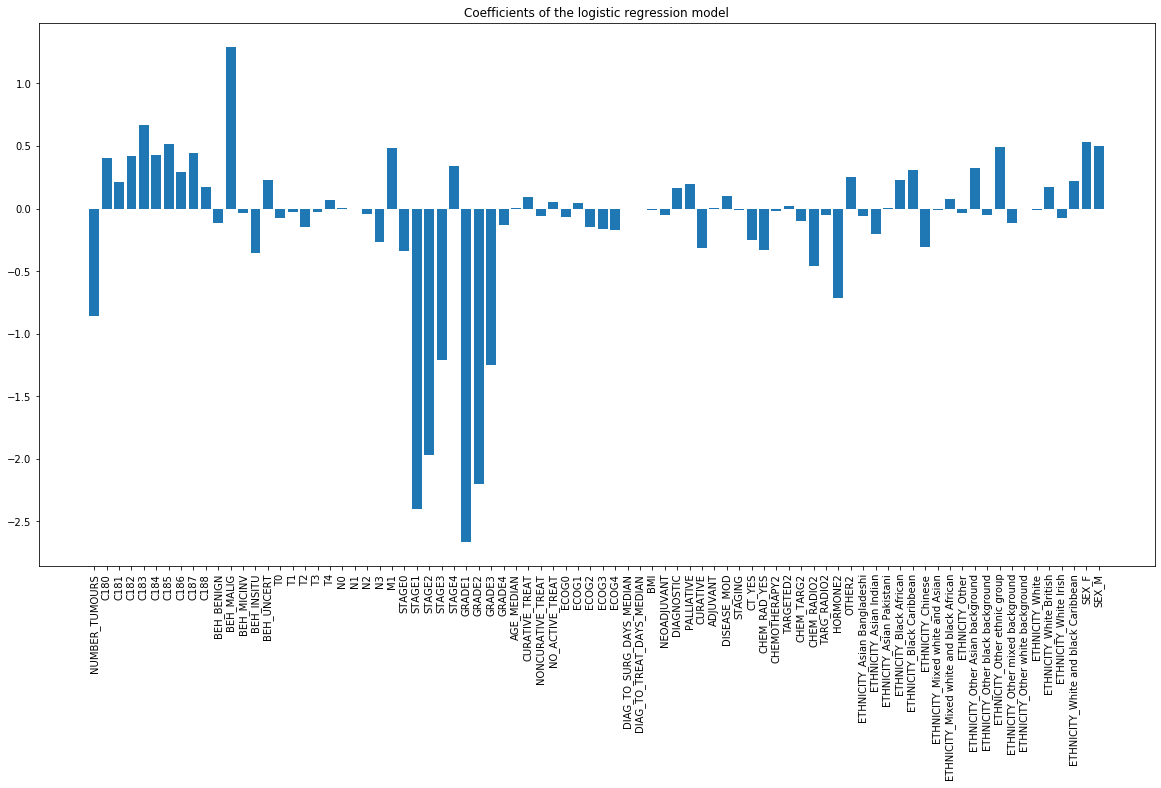

In [574]:
_ = plot_logistic_regression_coefficients(logr, X_train)

In [575]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [576]:
X_train2 = X_train.drop(columns=['NUMBER_TUMOURS'])

In [577]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [578]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.802
Precision: 0.628
F1-score: 0.704


In [579]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [580]:
X_train2 = X_train.drop(columns=['C180','C181','C182','C183','C184','C185','C186','C187','C188'])

In [581]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [582]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.802
Precision: 0.625
F1-score: 0.702


In [583]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [584]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT'])

In [585]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [586]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.802
Precision: 0.629
F1-score: 0.705


In [587]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [588]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'STAGE0','STAGE1','STAGE2','STAGE3','STAGE4'])

In [589]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [590]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.753
Precision: 0.634
F1-score: 0.688


In [591]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [592]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'GRADE1','GRADE2','GRADE3','GRADE4'])

In [593]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [594]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.722
Precision: 0.610
F1-score: 0.661


In [595]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [596]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'CURATIVE_TREAT','NONCURATIVE_TREAT','NO_ACTIVE_TREAT'])

In [597]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [598]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.802
Precision: 0.627
F1-score: 0.704


In [599]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [600]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4'])

In [601]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [602]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.802
Precision: 0.628
F1-score: 0.704


In [603]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [604]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'DIAG_TO_SURG_DAYS_MEDIAN'])

In [605]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [606]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.799
Precision: 0.622
F1-score: 0.699


In [607]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [608]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'DIAG_TO_TREAT_DAYS_MEDIAN'])

In [609]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [610]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.801
Precision: 0.626
F1-score: 0.703


In [611]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [612]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING'])

In [613]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [614]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.803
Precision: 0.628
F1-score: 0.705


In [615]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [616]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                 'CT_YES'])

In [617]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [618]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.803
Precision: 0.627
F1-score: 0.704


In [619]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [620]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                 'CHEM_RAD_YES'])

In [621]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [622]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.803
Precision: 0.628
F1-score: 0.705


In [623]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [624]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                 'CHEM_RAD_YES',
                                 'ETHNICITY_Asian Bangladeshi', 'ETHNICITY_Asian Indian', 
                                 'ETHNICITY_Asian Pakistani', 'ETHNICITY_Black African', 
                                 'ETHNICITY_Black Caribbean', 'ETHNICITY_Chinese',
                                 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African',
                                 'ETHNICITY_Other','ETHNICITY_Other Asian background',
                                 'ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
                                 'ETHNICITY_Other mixed background','ETHNICITY_Other white background',
                                 'ETHNICITY_White','ETHNICITY_White British','ETHNICITY_White Irish',
                                 'ETHNICITY_White and black Caribbean'])

In [625]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [626]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.804
Precision: 0.628
F1-score: 0.705


In [627]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [628]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                 'CHEM_RAD_YES',
                                 'ETHNICITY_Asian Bangladeshi', 'ETHNICITY_Asian Indian', 
                                 'ETHNICITY_Asian Pakistani', 'ETHNICITY_Black African', 
                                 'ETHNICITY_Black Caribbean', 'ETHNICITY_Chinese',
                                 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African',
                                 'ETHNICITY_Other','ETHNICITY_Other Asian background',
                                 'ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
                                 'ETHNICITY_Other mixed background','ETHNICITY_Other white background',
                                 'ETHNICITY_White','ETHNICITY_White British','ETHNICITY_White Irish',
                                 'ETHNICITY_White and black Caribbean',
                                 'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2'])

In [629]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [630]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.805
Precision: 0.628
F1-score: 0.705


In [631]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [632]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                 'CHEM_RAD_YES',
                                 'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                 'ETHNICITY_Asian Bangladeshi', 'ETHNICITY_Asian Indian', 
                                 'ETHNICITY_Asian Pakistani', 'ETHNICITY_Black African', 
                                 'ETHNICITY_Black Caribbean', 'ETHNICITY_Chinese',
                                 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African',
                                 'ETHNICITY_Other','ETHNICITY_Other Asian background',
                                 'ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
                                 'ETHNICITY_Other mixed background','ETHNICITY_Other white background',
                                 'ETHNICITY_White','ETHNICITY_White British','ETHNICITY_White Irish',
                                 'ETHNICITY_White and black Caribbean',
                                 'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2'])

In [633]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [634]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.806
Precision: 0.627
F1-score: 0.705


In [635]:
X_train.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0,0,0,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,1,0,0,1,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,1,0,0,1,0,0,0,0,48.0,55.0,27.104074,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,0,0,0,0,0,0,1,0,207.0,92.0,25.540853,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0,0,1,0,0,0,0,0,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [636]:
X_train2 = X_train.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                                 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                 'CHEM_RAD_YES',
                                 'CURATIVE_TREAT','NONCURATIVE_TREAT','NO_ACTIVE_TREAT',
                                 'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                 'ETHNICITY_Asian Bangladeshi', 'ETHNICITY_Asian Indian', 
                                 'ETHNICITY_Asian Pakistani', 'ETHNICITY_Black African', 
                                 'ETHNICITY_Black Caribbean', 'ETHNICITY_Chinese',
                                 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African',
                                 'ETHNICITY_Other','ETHNICITY_Other Asian background',
                                 'ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
                                 'ETHNICITY_Other mixed background','ETHNICITY_Other white background',
                                 'ETHNICITY_White','ETHNICITY_White British','ETHNICITY_White Irish',
                                 'ETHNICITY_White and black Caribbean',
                                 'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2'])

In [637]:
logr.fit(X_train2, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [638]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.806
Precision: 0.627
F1-score: 0.706


In [639]:
X_train2.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,CT_YES,SEX_F,SEX_M
26591,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,77.0,0.0,175.0,26.218821,0,1,0
15555,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,59.0,0.0,175.0,26.218821,0,1,0
10950,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,56.0,48.0,55.0,27.104074,0,0,1
41078,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,81.0,207.0,92.0,25.540853,0,1,0
21097,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,0.0,175.0,26.218821,0,1,0


In [640]:
X_train2.shape

(19479, 36)

In [641]:
X_train = X_train2.copy()

In [642]:
X_train.shape

(19479, 36)

In [643]:
X_test.shape

(4870, 82)

In [644]:
X_test = X_test.drop(columns=['BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT',
                              'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                              'CHEM_RAD_YES',
                              'CURATIVE_TREAT','NONCURATIVE_TREAT','NO_ACTIVE_TREAT',
                              'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                              'ETHNICITY_Asian Bangladeshi', 'ETHNICITY_Asian Indian', 
                              'ETHNICITY_Asian Pakistani', 'ETHNICITY_Black African', 
                              'ETHNICITY_Black Caribbean', 'ETHNICITY_Chinese',
                              'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African',
                              'ETHNICITY_Other','ETHNICITY_Other Asian background',
                              'ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
                              'ETHNICITY_Other mixed background','ETHNICITY_Other white background',
                              'ETHNICITY_White','ETHNICITY_White British','ETHNICITY_White Irish',
                              'ETHNICITY_White and black Caribbean',
                              'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2'])

In [645]:
X_test.shape

(4870, 36)

In [648]:
logr_grid = GridSearchCV(LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=5000), 
                         param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                         cv=5, scoring='f1') 

In [649]:
logr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [650]:
print('Best F1-score: %.3f' % logr_grid.best_score_) 
print('Best parameters: %s' % logr_grid.best_params_)

Best F1-score: 0.706
Best parameters: {'C': 1000}


In [653]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=5000, C=1000) 

In [654]:
logr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [655]:
cv = 10
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.808
Precision: 0.627
F1-score: 0.706


In [656]:
y_predicted = logr.predict(X_test)

In [657]:
logr_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(logr_confusion_matrix)

[[1266  263]
 [ 745 2596]]


In [658]:
true_positives, false_negatives, false_positives, true_negatives = logr_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 1266
True negatives: 2596
False positives: 745
False negatives: 263


In [659]:
def plot_confusion_matrix(logr_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(logr_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

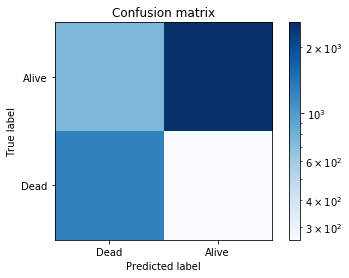

In [660]:
_ = plot_confusion_matrix(logr_confusion_matrix)

In [661]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.91      0.78      0.84      3341
        Dead       0.63      0.83      0.72      1529

    accuracy                           0.79      4870
   macro avg       0.77      0.80      0.78      4870
weighted avg       0.82      0.79      0.80      4870



Average precision-recall score: 0.77


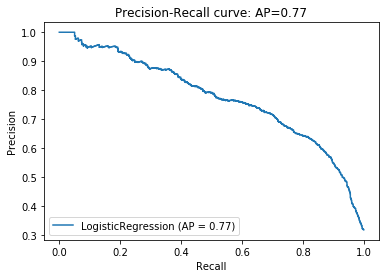

In [662]:
y_predicted_proba_logr = logr.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_logr[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(logr, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

# Decision Tree

In [762]:
clfTree = DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [763]:
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [764]:
cv = 5
recall_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='recall').mean()
precision_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='precision').mean()
f1_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_clfTree)
print('Precision: %.3f' % precision_clfTree)
print('F1-score: %.3f' % f1_clfTree)

Recall: 0.601
Precision: 0.569
F1-score: 0.585


In [774]:
clfTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced', random_state=0),
                       param_grid = {'max_depth': np.arange(1,40,5),
                                     'min_samples_leaf': np.arange(1,40,5),
                                     'min_samples_split': np.arange(2,40,5),
                                     'max_features': ['auto','sqrt']
                                    },                                    
                       cv = 10,
                       scoring = 'f1'
                       )

In [775]:
clfTree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 3

In [776]:
print('Best F1-score: %.3f' % clfTree_grid.best_score_) 
print('Best parameters: %s' % clfTree_grid.best_params_)

Best F1-score: 0.680
Best parameters: {'max_depth': 21, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 37}


In [778]:
clfTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced', random_state=0),
                       param_grid = {'max_depth': np.arange(19,23),
                                     'min_samples_leaf': np.arange(14,18),
                                     'min_samples_split': np.arange(35,39),
                                     'max_features': ['auto','sqrt']
                                    },                                    
                       cv = 10,
                       scoring = 'f1'
                       )

In [779]:
clfTree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([19, 20, 21, 22]),
           

In [780]:
print('Best F1-score: %.3f' % clfTree_grid.best_score_) 
print('Best parameters: %s' % clfTree_grid.best_params_)

Best F1-score: 0.681
Best parameters: {'max_depth': 22, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 37}


In [781]:
clfTree = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth=22, max_features='auto',
                                min_samples_leaf=16, min_samples_split=37)

In [782]:
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=22, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=37,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [783]:
cv = 10
recall_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='recall').mean()
precision_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='precision').mean()
f1_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_clfTree)
print('Precision: %.3f' % precision_clfTree)
print('F1-score: %.3f' % f1_clfTree)

Recall: 0.774
Precision: 0.608
F1-score: 0.681


In [784]:
y_predicted = clfTree.predict(X_test)

In [785]:
clfTree_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfTree_confusion_matrix)

[[1235  294]
 [ 746 2595]]


In [786]:
true_positives, false_negatives, false_positives, true_negatives = clfTree_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 1235
True negatives: 2595
False positives: 746
False negatives: 294


In [787]:
def plot_confusion_matrix(clfTree_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfTree_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

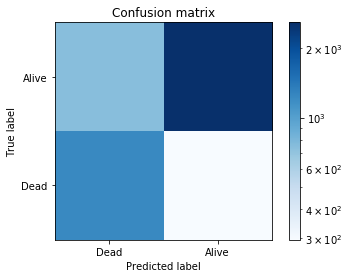

In [788]:
_ = plot_confusion_matrix(clfTree_confusion_matrix)

In [789]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.90      0.78      0.83      3341
        Dead       0.62      0.81      0.70      1529

    accuracy                           0.79      4870
   macro avg       0.76      0.79      0.77      4870
weighted avg       0.81      0.79      0.79      4870



Average precision-recall score: 0.73


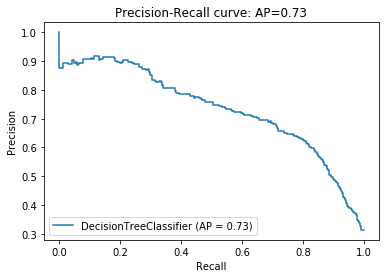

In [790]:
y_predicted_proba_clfTree = clfTree.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfTree[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfTree, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

# Random Forest

In [791]:
clfRF = RandomForestClassifier(class_weight='balanced', random_state=0)

In [792]:
clfRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [793]:
cv = 3
recall_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='recall').mean()
precision_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='precision').mean()
f1_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_RF)
print('Precision: %.3f' % precision_RF)
print('F1-score: %.3f' % f1_RF)

Recall: 0.601
Precision: 0.669
F1-score: 0.633


In [795]:
RF_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=0, n_estimators=100),
                       param_grid = {'max_depth': np.arange(1,35,5),
                                     'min_samples_leaf': np.arange(1,35,5),
                                     'min_samples_split': np.arange(2,35,5),
                                     'max_features': ['auto','sqrt']
                                    },
                       cv = 3,
                       scoring = 'f1')

In [796]:
RF_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
                                              oob_score=False, random_state=0,
                                

In [797]:
print('Best F1-score: %.3f' % RF_grid.best_score_) 
print('Best parameters: %s' % RF_grid.best_params_)

Best F1-score: 0.703
Best parameters: {'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 32}


In [825]:
RF_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=0, n_estimators=100),
                       param_grid = {'max_depth': np.arange(9,13),
                                     'min_samples_leaf': np.arange(4,8),
                                     'min_samples_split': np.arange(30,34),
                                     'max_features': ['auto','sqrt']
                                    },
                       cv = 10,
                       scoring = 'f1')

In [826]:
RF_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                            

In [827]:
print('Best F1-score: %.3f' % RF_grid.best_score_) 
print('Best parameters: %s' % RF_grid.best_params_)

Best F1-score: 0.704
Best parameters: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 33}


In [836]:
clfRF = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=12, max_features='auto', 
                               min_samples_leaf=4, min_samples_split=33, n_estimators=100)

In [837]:
clfRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=33,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [838]:
cv = 10
recall_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='recall').mean()
precision_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='precision').mean()
f1_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_RF)
print('Precision: %.3f' % precision_RF)
print('F1-score: %.3f' % f1_RF)

Recall: 0.786
Precision: 0.638
F1-score: 0.704


In [839]:
y_predicted = clfRF.predict(X_test)

In [840]:
clfRF_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfRF_confusion_matrix)

[[1221  308]
 [ 666 2675]]


In [841]:
true_positives, false_negatives, false_positives, true_negatives = clfRF_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 1221
True negatives: 2675
False positives: 666
False negatives: 308


In [842]:
def plot_confusion_matrix(clfRF_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfRF_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

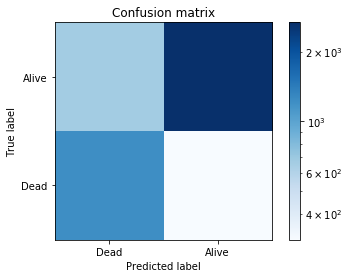

In [843]:
_ = plot_confusion_matrix(clfRF_confusion_matrix)

In [844]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.90      0.80      0.85      3341
        Dead       0.65      0.80      0.71      1529

    accuracy                           0.80      4870
   macro avg       0.77      0.80      0.78      4870
weighted avg       0.82      0.80      0.80      4870



Average precision-recall score: 0.76


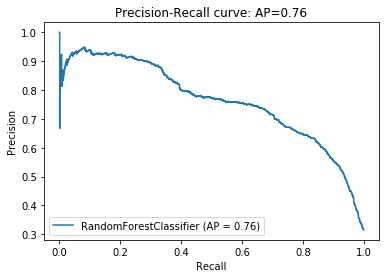

In [845]:
y_predicted_proba_clfRF = clfRF.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfRF[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfRF, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

# Gradient Boosting

In [846]:
clfGB = GradientBoostingClassifier(random_state=0)

In [847]:
clfGB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [848]:
cv = 3
recall_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring='recall').mean()
precision_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring='precision').mean()
f1_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_GB)
print('Precision: %.3f' % precision_GB)
print('F1-score: %.3f' % f1_GB)

Recall: 0.632
Precision: 0.743
F1-score: 0.683


In [870]:
GB_grid = GridSearchCV(GradientBoostingClassifier(random_state=0, n_estimators=100),
                       param_grid = {'max_depth': np.arange(1,30,5),
                                     'min_samples_leaf': np.arange(1,40,5)
                                     },
                       cv = 3,
                       scoring = 'recall')

In [871]:
GB_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [872]:
print('Best recall: %.3f' % GB_grid.best_score_) 
print('Best parameters: %s' % GB_grid.best_params_)

Best recall: 0.643
Best parameters: {'max_depth': 11, 'min_samples_leaf': 16}


In [884]:
GB_grid = GridSearchCV(GradientBoostingClassifier(random_state=0, n_estimators=100),
                       param_grid = {'max_depth': np.arange(6,11),
                                     'min_samples_leaf': np.arange(12,17)
                                     },
                       cv = 5,
                       scoring = 'recall')

In [885]:
GB_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [886]:
print('Best recall: %.3f' % GB_grid.best_score_) 
print('Best parameters: %s' % GB_grid.best_params_)

Best recall: 0.642
Best parameters: {'max_depth': 9, 'min_samples_leaf': 14}


In [887]:
clfGB = GradientBoostingClassifier(n_estimators=100, random_state=0, max_depth=9, min_samples_leaf=14)

In [888]:
clfGB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=14, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [889]:
cv = 10
recall_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring='recall').mean()
precision_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring='precision').mean()
f1_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_GB)
print('Precision: %.3f' % precision_GB)
print('F1-score: %.3f' % f1_GB)

Recall: 0.644
Precision: 0.721
F1-score: 0.680


In [895]:
y_predicted = clfGB.predict(X_test)

In [898]:
clfGB_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfGB_confusion_matrix)

[[1008  521]
 [ 404 2937]]


In [899]:
true_positives, false_negatives, false_positives, true_negatives = clfGB_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 1008
True negatives: 2937
False positives: 404
False negatives: 521


In [900]:
def plot_confusion_matrix(clfGB_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfGB_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

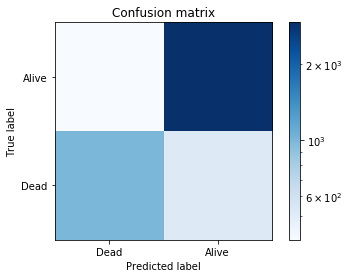

In [901]:
_ = plot_confusion_matrix(clfGB_confusion_matrix)

In [902]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.85      0.88      0.86      3341
        Dead       0.71      0.66      0.69      1529

    accuracy                           0.81      4870
   macro avg       0.78      0.77      0.77      4870
weighted avg       0.81      0.81      0.81      4870



Average precision-recall score: 0.76


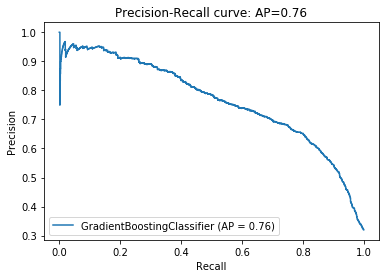

In [903]:
y_predicted_proba_clfGB = clfGB.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfGB[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfGB, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

# Light Gradient Boosting Machine

In [904]:
clfLGB = LGBMClassifier(class_weight='balanced', random_state=0)

In [905]:
clfLGB.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [906]:
cv = 3
recall_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_LGB)
print('Precision: %.3f' % precision_LGB)
print('F1-score: %.3f' % f1_LGB)

Recall: 0.794
Precision: 0.632
F1-score: 0.704


In [907]:
LGB_grid = GridSearchCV(LGBMClassifier(class_weight='balanced', random_state=0, objective='binary', 
                                       n_estimators=100, learning_rate=0.1),
                       param_grid = {'num_leaves': np.arange(10,35,5),
                                     'min_data_in_leaf': np.arange(2,20,5),
                                     'max_depth': np.arange(2,20,5),
                                     'min_child_weight': [0.000001,0.00001,0.0001,0.001]
                                     
                                     },
                       cv = 3,
                       scoring = 'f1')

In [908]:
LGB_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt',
                                      class_weight='balanced',
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
           

In [909]:
print('Best F1-score: %.3f' % LGB_grid.best_score_) 
print('Best parameters: %s' % LGB_grid.best_params_)

Best F1-score: 0.709
Best parameters: {'max_depth': 12, 'min_child_weight': 1e-06, 'min_data_in_leaf': 7, 'num_leaves': 10}


In [916]:
LGB_grid = GridSearchCV(LGBMClassifier(class_weight='balanced', random_state=0, objective='binary', 
                                       n_estimators=100, learning_rate=0.1),
                       param_grid = {'num_leaves': np.arange(8,12),
                                     'min_data_in_leaf': np.arange(5,8),
                                     'max_depth': np.arange(8,13),
                                     'min_child_weight': [0.000001,0.00001,0.0001]
                                     },
                       cv = 5,
                       scoring = 'f1')

In [917]:
LGB_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt',
                                      class_weight='balanced',
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
           

In [918]:
print('Best F1-score: %.3f' % LGB_grid.best_score_) 
print('Best parameters: %s' % LGB_grid.best_params_)

Best F1-score: 0.708
Best parameters: {'max_depth': 9, 'min_child_weight': 1e-06, 'min_data_in_leaf': 6, 'num_leaves': 10}


In [919]:
clfLGB = LGBMClassifier(class_weight='balanced', random_state=0, objective='binary', n_estimators=100, learning_rate=0.1,
                       max_depth=9, min_data_in_leaf=6, num_leaves=10, min_child_weight=0.000001)

In [920]:
clfLGB.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=9, min_child_samples=20, min_child_weight=1e-06,
               min_data_in_leaf=6, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=10, objective='binary', random_state=0,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [921]:
cv = 10
recall_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_LGB)
print('Precision: %.3f' % precision_LGB)
print('F1-score: %.3f' % f1_LGB)

Recall: 0.811
Precision: 0.629
F1-score: 0.708


In [922]:
y_predicted = clfLGB.predict(X_test)

In [923]:
clfLGB_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfLGB_confusion_matrix)

[[1275  254]
 [ 742 2599]]


In [924]:
true_positives, false_negatives, false_positives, true_negatives = clfLGB_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 1275
True negatives: 2599
False positives: 742
False negatives: 254


In [925]:
def plot_confusion_matrix(clfLGB_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfLGB_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

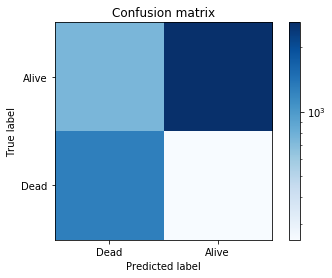

In [926]:
_ = plot_confusion_matrix(clfLGB_confusion_matrix)

In [927]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.91      0.78      0.84      3341
        Dead       0.63      0.83      0.72      1529

    accuracy                           0.80      4870
   macro avg       0.77      0.81      0.78      4870
weighted avg       0.82      0.80      0.80      4870



Average precision-recall score: 0.78


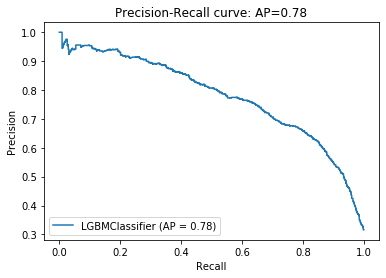

In [928]:
y_predicted_proba_clfLGB = clfLGB.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfLGB[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfLGB, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

# Adaptive Boosting

In [929]:
clfAB = AdaBoostClassifier(random_state=0)

In [930]:
clfAB.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)

In [931]:
cv = 3
recall_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_AB)
print('Precision: %.3f' % precision_AB)
print('F1-score: %.3f' % f1_AB)

Recall: 0.636
Precision: 0.736
F1-score: 0.682


In [1033]:
AB_grid = GridSearchCV(AdaBoostClassifier(random_state=0),
                       param_grid = {'learning_rate': [0.5,1,1.5],
                                     'n_estimators': [100,500,1000]
                                     },
                       cv = 3,
                       scoring = 'recall')

In [1034]:
AB_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [1035]:
print('Best recall: %.3f' % AB_grid.best_score_) 
print('Best parameters: %s' % AB_grid.best_params_)

Best recall: 0.638
Best parameters: {'learning_rate': 1.5, 'n_estimators': 100}


In [1036]:
clfAB = AdaBoostClassifier(random_state=0, n_estimators=100, learning_rate=1.5)

In [1037]:
clfAB.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.5,
                   n_estimators=100, random_state=0)

In [1038]:
cv = 10
recall_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring='recall').mean()
precision_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring='precision').mean()
f1_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring='f1').mean()
print('Recall: %.3f' % recall_AB)
print('Precision: %.3f' % precision_AB)
print('F1-score: %.3f' % f1_AB)

Recall: 0.638
Precision: 0.733
F1-score: 0.682


In [1039]:
y_predicted = clfAB.predict(X_test)

In [1040]:
clfAB_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfAB_confusion_matrix)

[[ 998  531]
 [ 381 2960]]


In [1041]:
true_positives, false_negatives, false_positives, true_negatives = clfAB_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 998
True negatives: 2960
False positives: 381
False negatives: 531


In [1042]:
def plot_confusion_matrix(clfAB_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfAB_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

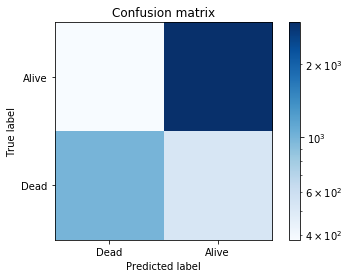

In [1043]:
_ = plot_confusion_matrix(clfAB_confusion_matrix)

In [1044]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.85      0.89      0.87      3341
        Dead       0.72      0.65      0.69      1529

    accuracy                           0.81      4870
   macro avg       0.79      0.77      0.78      4870
weighted avg       0.81      0.81      0.81      4870



Average precision-recall score: 0.77


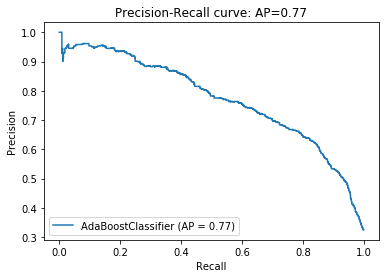

In [1045]:
y_predicted_proba_clfAB = clfAB.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfAB[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfAB, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

# XGBoost

In [1046]:
clfXGB = XGBClassifier(class_weight='balanced', random_state=0)

In [1047]:
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [1048]:
cv = 3
recall_XGB = cross_val_score(clfXGB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_XGB = cross_val_score(clfXGB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_XGB = cross_val_score(clfXGB, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_XGB)
print('Precision: %.3f' % precision_XGB)
print('F1-score: %.3f' % f1_XGB)

Recall: 0.632
Precision: 0.719
F1-score: 0.673


In [1049]:
XGB_grid = GridSearchCV(XGBClassifier(n_estimators=100, random_state=0),
                       param_grid = {'min_child_weight': np.arange(1,15,3),
                                     'max_depth': np.arange(1,20,3),
                                     'gamma':np.arange(0,10,2)
                                     },
                       cv = 3,
                       scoring = 'recall')

In [1050]:
XGB_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
  

In [1051]:
print('Best recall: %.3f' % XGB_grid.best_score_) 
print('Best parameters: %s' % XGB_grid.best_params_)

Best recall: 0.640
Best parameters: {'gamma': 2, 'max_depth': 4, 'min_child_weight': 7}


In [1052]:
XGB_grid = GridSearchCV(XGBClassifier(n_estimators=100, random_state=0),
                       param_grid = {'min_child_weight': np.arange(6,8),
                                     'max_depth': np.arange(3,5),
                                     'gamma':np.arange(0,3)
                                     },
                       cv = 3,
                       scoring = 'recall')

In [1053]:
XGB_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
  

In [1054]:
print('Best recall: %.3f' % XGB_grid.best_score_) 
print('Best parameters: %s' % XGB_grid.best_params_)

Best recall: 0.640
Best parameters: {'gamma': 2, 'max_depth': 4, 'min_child_weight': 7}


In [1055]:
clfXGB = XGBClassifier(class_weight='balanced', random_state=0, gamma=2, max_depth=4, min_child_weight=7)

In [1056]:
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=7, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [1057]:
cv = 10
recall_XGB = cross_val_score(clfXGB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_XGB = cross_val_score(clfXGB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_XGB = cross_val_score(clfXGB, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_XGB)
print('Precision: %.3f' % precision_XGB)
print('F1-score: %.3f' % f1_XGB)

Recall: 0.634
Precision: 0.736
F1-score: 0.681


In [1058]:
y_predicted = clfXGB.predict(X_test)

In [1059]:
clfXGB_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfXGB_confusion_matrix)

[[1002  527]
 [ 366 2975]]


In [1060]:
true_positives, false_negatives, false_positives, true_negatives = clfXGB_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 1002
True negatives: 2975
False positives: 366
False negatives: 527


In [1061]:
def plot_confusion_matrix(clfXGB_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfXGB_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

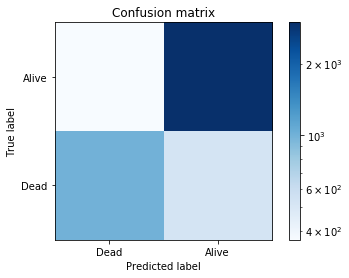

In [1062]:
_ = plot_confusion_matrix(clfXGB_confusion_matrix)

In [1063]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.85      0.89      0.87      3341
        Dead       0.73      0.66      0.69      1529

    accuracy                           0.82      4870
   macro avg       0.79      0.77      0.78      4870
weighted avg       0.81      0.82      0.81      4870



Average precision-recall score: 0.77


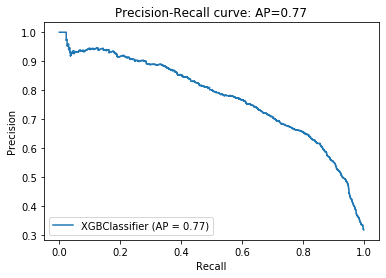

In [1064]:
y_predicted_proba_clfXGB = clfXGB.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfXGB[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfXGB, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

In [880]:
print('Recall: %.3f' % recall_GB)

Recall: 0.000


In [881]:
print(f"Recall: {recall_GB:.1%}")

Recall: 0.0%


In [272]:
# def plot_roc_curve(y_test, y_predicted):    
#     fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
#     roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
#     fig, ax = plt.subplots()    
#     ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
#     ax.plot([0, 1], [0, 1], 'k--') 
#     ax.set_xlim([0.0, 1.0])    
#     ax.set_ylim([0.0, 1.0])    
#     ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
#     ax.set_ylabel('True Positive Rate or (Sensitivity)')    
#     ax.set_title('ROC Curve Random Forest')    
#     ax.legend(loc="lower right")    
#     return fig, ax

In [273]:
# _ = plot_roc_curve(y_test, y_predicted_proba_RF)

In [809]:
# from sklearn.base import clone 

# def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
#      # clone the model to have the exact same specification as the one initially trained
#     model_clone = clone(model)
#     # set random_state for comparability
#     model_clone.random_state = random_state
#     # training and scoring the benchmark model
#     model_clone.fit(X_train, y_train)
#     benchmark_score = model_clone.score(X_train, y_train)
#     # list for storing feature importances
#     importances = []
#     # iterating over all columns and storing feature importance (difference between benchmark and new model)
#     for col in X_train.columns:
#         model_clone = clone(model)
#         model_clone.random_state = random_state
#         model_clone.fit(X_train.drop(col, axis = 1), y_train)
#         drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
#         importances.append(benchmark_score - drop_col_score)
 
#     importances_df = pd.DataFrame(data={'Feature': X_train.columns, 'Importance': importances})
#     return importances_df

In [811]:
# drop_col_feat_imp(clfRF, X_train, y_train)

In [826]:
# # # clone the model to have the exact same specification as the one initially trained
# # model_clone = clone(clfRF)
# # random_state = 42
# # # set random_state for comparability
# # model_clone.random_state = random_state
# # # training and scoring the benchmark model
# # model_clone.fit(X_train, y_train)
# # benchmark_score = model_clone.score(X_train, y_train)
# # list for storing feature importances
# importances = []
# # iterating over all columns and storing feature importance (difference between benchmark and new model)
# for col in X_train.columns:
#     model_clone = clone(clfRF)
#     model_clone.random_state = random_state
#     model_clone.fit(X_train.drop(col, axis = 1), y_train)
#     drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
#     importances.append(benchmark_score - drop_col_score)
# importances_df = pd.DataFrame(data={'Feature': X_train.columns, 'Importance': importances})
# importances_df.head()

In [825]:
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(importances_df.Importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
# plt.barh(pos, importances_df.Importance[sorted_idx], align='center')
# plt.yticks(pos, np.asarray(X_train.columns.to_list())[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.gcf().set_size_inches(15,20)
# plt.show()

In [824]:
# importances_df.sort_values(by='Importance', ascending=False)